<a href="https://colab.research.google.com/github/shauryasachdev/Deep-Learning/blob/main/Convolutional_Neural_Networks_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==2.0.2
!pip install pandas==2.2.2
!pip install tensorflow_cpu==2.19.0
!pip install matplotlib==3.9.3

In [2]:
import os
os.environ['TS_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

In [4]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

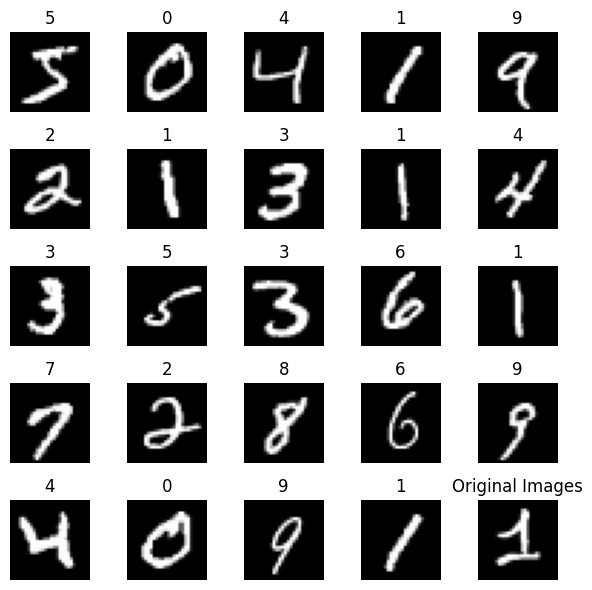

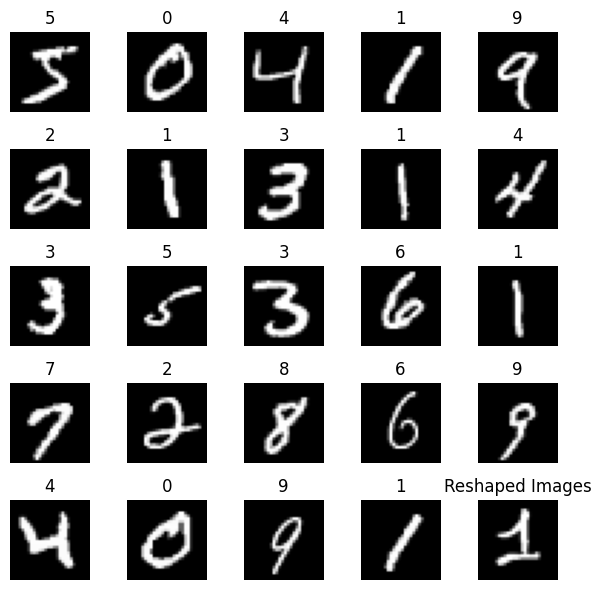

In [5]:
# import data
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(Y_train[i])
    plt.axis('off')

plt.tight_layout()
plt.title('Original Images')
plt.show()


# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

plt.figure(figsize=(6, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(Y_train[i])
    plt.axis('off')

plt.tight_layout()
plt.title('Reshaped Images')
plt.show()

In [6]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

In [7]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

num_classes = Y_test.shape[1] # number of categories

In [8]:
def convolutional_model():

  #create model
  model = Sequential()
  model.add(Input(shape=(28,28,1)))
  model.add(Conv2D(16, (5,5), strides = (1,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  #compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [9]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100 - scores[1]*100))

Epoch 1/10
300/300 - 19s - 64ms/step - accuracy: 0.9176 - loss: 0.2939 - val_accuracy: 0.9698 - val_loss: 0.1061
Epoch 2/10
300/300 - 19s - 62ms/step - accuracy: 0.9753 - loss: 0.0855 - val_accuracy: 0.9802 - val_loss: 0.0643
Epoch 3/10
300/300 - 19s - 65ms/step - accuracy: 0.9838 - loss: 0.0553 - val_accuracy: 0.9794 - val_loss: 0.0635
Epoch 4/10
300/300 - 21s - 68ms/step - accuracy: 0.9869 - loss: 0.0442 - val_accuracy: 0.9837 - val_loss: 0.0495
Epoch 5/10
300/300 - 13s - 44ms/step - accuracy: 0.9888 - loss: 0.0358 - val_accuracy: 0.9844 - val_loss: 0.0448
Epoch 6/10
300/300 - 15s - 51ms/step - accuracy: 0.9915 - loss: 0.0288 - val_accuracy: 0.9842 - val_loss: 0.0477
Epoch 7/10
300/300 - 13s - 44ms/step - accuracy: 0.9929 - loss: 0.0240 - val_accuracy: 0.9869 - val_loss: 0.0422
Epoch 8/10
300/300 - 14s - 46ms/step - accuracy: 0.9940 - loss: 0.0199 - val_accuracy: 0.9869 - val_loss: 0.0429
Epoch 9/10
300/300 - 20s - 67ms/step - accuracy: 0.9948 - loss: 0.0172 - val_accuracy: 0.9880 - 

In [11]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=1024, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/10
59/59 - 15s - 248ms/step - accuracy: 0.8340 - loss: 0.6324 - val_accuracy: 0.9317 - val_loss: 0.2406
Epoch 2/10
59/59 - 14s - 240ms/step - accuracy: 0.9409 - loss: 0.2050 - val_accuracy: 0.9578 - val_loss: 0.1527
Epoch 3/10
59/59 - 20s - 332ms/step - accuracy: 0.9611 - loss: 0.1363 - val_accuracy: 0.9687 - val_loss: 0.1116
Epoch 4/10
59/59 - 21s - 356ms/step - accuracy: 0.9717 - loss: 0.0996 - val_accuracy: 0.9743 - val_loss: 0.0875
Epoch 5/10
59/59 - 14s - 230ms/step - accuracy: 0.9779 - loss: 0.0780 - val_accuracy: 0.9793 - val_loss: 0.0704
Epoch 6/10
59/59 - 13s - 219ms/step - accuracy: 0.9818 - loss: 0.0652 - val_accuracy: 0.9814 - val_loss: 0.0609
Epoch 7/10
59/59 - 21s - 358ms/step - accuracy: 0.9841 - loss: 0.0570 - val_accuracy: 0.9818 - val_loss: 0.0555
Epoch 8/10
59/59 - 13s - 228ms/step - accuracy: 0.9861 - loss: 0.0497 - val_accuracy: 0.9837 - val_loss: 0.0495
Epoch 9/10
59/59 - 20s - 340ms/step - accuracy: 0.9871 - loss: 0.0444 - val_accuracy: 0.9847 - val_loss:

In [13]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=25, batch_size=1024, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/25
59/59 - 14s - 243ms/step - accuracy: 0.8380 - loss: 0.6476 - val_accuracy: 0.9341 - val_loss: 0.2316
Epoch 2/25
59/59 - 21s - 354ms/step - accuracy: 0.9456 - loss: 0.1908 - val_accuracy: 0.9585 - val_loss: 0.1429
Epoch 3/25
59/59 - 13s - 228ms/step - accuracy: 0.9638 - loss: 0.1261 - val_accuracy: 0.9672 - val_loss: 0.1095
Epoch 4/25
59/59 - 15s - 251ms/step - accuracy: 0.9736 - loss: 0.0947 - val_accuracy: 0.9758 - val_loss: 0.0779
Epoch 5/25
59/59 - 13s - 223ms/step - accuracy: 0.9787 - loss: 0.0750 - val_accuracy: 0.9780 - val_loss: 0.0672
Epoch 6/25
59/59 - 14s - 231ms/step - accuracy: 0.9827 - loss: 0.0629 - val_accuracy: 0.9810 - val_loss: 0.0604
Epoch 7/25
59/59 - 14s - 236ms/step - accuracy: 0.9841 - loss: 0.0558 - val_accuracy: 0.9826 - val_loss: 0.0544
Epoch 8/25
59/59 - 20s - 334ms/step - accuracy: 0.9862 - loss: 0.0494 - val_accuracy: 0.9832 - val_loss: 0.0515
Epoch 9/25
59/59 - 21s - 355ms/step - accuracy: 0.9878 - loss: 0.0435 - val_accuracy: 0.9816 - val_loss: